# WeatherPy
----

### Analysis
* From the Sample set we can determine that at a higher latitude this is a lower Max Temperature probably do with this distance from the equator that these cities are located. 
* There is no strong relationship between cloudiness and humidity, and latitude. 
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
import datetime
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude.
from citipy import citipy

# Output File (CSV).
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)

# Define URL of API, measurable units, and assign url to query variable. 
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There are {len(cities)} cities in this list.')

There are 645 cities in this list.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Declare variables for capturing data from API
weather_check = []
temp_name_lat = []
city_names = []
city_lats = []
city_temps = []
city_humidity = []
city_clouds = []
city_dates = []
city_wind_speed = []
set_count = 1
city_count = 0
record_count = 0

# Loop through API data and capture variable for lists. 
for city in cities:
    # Try and Except test for in city name does not register with API. 
    try:
        
        print(f"Pulling {city} for record {record_count} of set {set_count} from API")
        # Get request for API Data and add to list.
        get_weather_city = requests.get(query_url + city).json()
        weather_check.append(get_weather_city)
        # City Name column lists.
        
        city_name = weather_check[city_count]['name']
        city_names.append(city_name)
        
        # City Latitude column lists.
        city_lat = weather_check[city_count]['coord']['lat']
        city_lats.append(city_lat)
        
        # City Temperature column lists.
        city_temp = weather_check[city_count]['main']['temp_max']
        city_temps.append(city_temp)
        
        # City Humidity column lists.
        city_humid = weather_check[city_count]['main']['humidity']
        city_humidity.append(city_humid)
        
        # City Cloudiness column lists.
        city_cloud = weather_check[city_count]['clouds']['all']
        city_clouds.append(city_cloud)
        
        # City Wind column lists.
        city_wind = weather_check[city_count]['wind']['speed']
        city_wind_speed.append(city_wind)
        
        # Date column lists.
        city_date = weather_check[city_count]['dt']
        city_dates.append(city_date)
        
        # Concatinate counters.
        city_count = city_count + 1
        record_count = record_count + 1
    
    except KeyError:
        print(f"{city} is not found in api call. Skipping.....")
        city_count = city_count + 1
        
    # Rest statement for API runs every 60 cities pulled.     
    if record_count % 60 == 0:
        print("Resting API for 60 seconds...")
        time.sleep(60)
        set_count = set_count + 1

Pulling taoudenni for record 0 of set 1 from API
Pulling rikitea for record 1 of set 1 from API
Pulling kodiak for record 2 of set 1 from API
Pulling narsaq for record 3 of set 1 from API
Pulling juneau for record 4 of set 1 from API
Pulling albany for record 5 of set 1 from API
Pulling bluff for record 6 of set 1 from API
Pulling port alfred for record 7 of set 1 from API
Pulling geraldton for record 8 of set 1 from API
Pulling sitka for record 9 of set 1 from API
Pulling belushya guba for record 10 of set 1 from API
belushya guba is not found in api call. Skipping.....
Pulling toliary for record 10 of set 1 from API
toliary is not found in api call. Skipping.....
Pulling kavieng for record 10 of set 1 from API
Pulling saldanha for record 11 of set 1 from API
Pulling lagoa for record 12 of set 1 from API
Pulling talnakh for record 13 of set 1 from API
Pulling general roca for record 14 of set 1 from API
Pulling punta arenas for record 15 of set 1 from API
Pulling puerto ayora for reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Build data frame and city data column variables from loop. 
city_data_df = pd.DataFrame({'Name': city_names,
                           'Date': city_dates,
                           'Max Temperature': city_temps,
                           'Latitude':city_lats,
                           'Humidity %': city_humidity,
                           'Cloudiness %': city_clouds,
                           'Wind Speed': city_wind_speed,})

# Write data frame to csv file. 
city_data_df.to_csv('output_data/DataFrame_Results.csv')

# Display data frame.
city_data_df.head()

,Name,Date,Max Temperature,Latitude,Humidity %,Cloudiness %,Wind Speed
0,Taoudenni,1540690227,16.70,22.68,38,0,1.21
1,Rikitea,1540689628,22.88,-23.12,100,32,6.57
2,Kodiak,1540687980,13.00,39.95,71,1,2.10
3,Narsaq,1540687800,1.00,60.91,80,80,2.10
4,Juneau,1540688160,8.00,58.30,93,75,1.50


In [5]:
# Capture and convert date from unix time stamp to normal date. 
timestamp = datetime.datetime.fromtimestamp(city_dates[0])
actual_date = timestamp.strftime('%m/%d/%Y')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

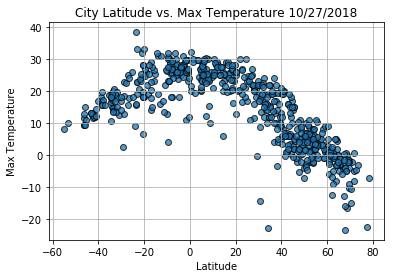

In [6]:
# Store column values into list variables. 
max_temp_list = city_data_df['Max Temperature']
lat_list = city_data_df['Latitude']

# Latitue vs Temperature Plot. 
plt.scatter(lat_list, max_temp_list, marker="o", edgecolors="black", alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Max Temperature {actual_date}')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.savefig('output_data/latvstemp.png')

#### Latitude vs. Humidity Plot

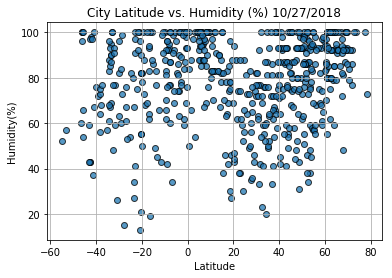

In [7]:
# Store Humidity column values into list. 
humidity_list = city_data_df['Humidity %']

# Latitude vs. Humidity Plot. 
plt.scatter(lat_list, humidity_list, marker="o", edgecolors="black", alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Humidity (%) {actual_date}')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.savefig('output_data/latvshumidity.png')

#### Latitude vs. Cloudiness Plot

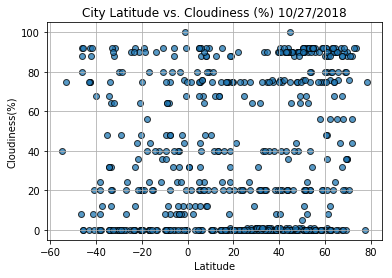

In [8]:
# Store Cloudiness values into list variable.
cloud_list = city_data_df['Cloudiness %']

# Latitude vs. Cloudiness Plot. 
plt.scatter(lat_list, cloud_list, marker="o", edgecolors="black", alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Cloudiness (%) {actual_date}')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.savefig('output_data/latvscloud.png')

#### Latitude vs. Wind Speed Plot

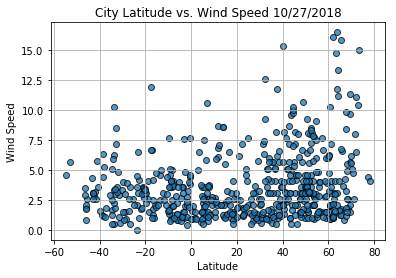

In [9]:
# Store Wind Speed column values in list variable. 
wind_list = city_data_df['Wind Speed']

# Latitude vs. Wind Speed Plot. 
plt.scatter(lat_list, wind_list, marker="o", edgecolors="black", alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Wind Speed {actual_date}')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig('output_data/latvswind.png')